In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join, exists
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## Analyse du dataset d'origine

In [9]:
path_train_ori = "C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Yolo_Format/labels/train"
path_val_ori = "C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Yolo_Format/labels/val/"

In [8]:
bibliotheque = pd.DataFrame(columns=range(0, 5))
bibliotheque

,0,1,2,3,4


In [30]:
df_val_ori = pd.DataFrame(columns=range(1, 5))

for text in os.listdir(path_val_ori):
    # print(text)
    with open(join(path_val_ori,text), "r") as file:
        df = pd.read_csv((file), sep=" ", header = None)
        # print(df)
        df_val_ori = pd.concat([df_val_ori, df], ignore_index=True)
df_val_ori

,1,2,3,4,0
0,0.414794,0.342500,0.181648,0.155000,0.0
1,0.430712,0.544375,0.434457,0.233750,2.0
2,0.646510,0.262071,0.132305,0.247982,0.0
3,0.254870,0.674928,0.186688,0.467815,2.0
4,0.641234,0.599193,0.217532,0.407495,2.0
...,...,...,...,...,...
62,0.919344,0.558125,0.068227,0.218750,2.0
63,0.360635,0.533125,0.097348,0.176250,2.0
64,0.576963,0.461250,0.042434,0.090000,2.0
65,0.628965,0.449375,0.034945,0.103750,2.0


In [2]:
def read_labels(path_txt):
    df = pd.DataFrame(columns=range(1, 5))
    for text in os.listdir(path_txt):
        with open(join(path_txt,text), "r") as file:
            df_txt = pd.read_csv((file), sep=" ", header = None)
            df = pd.concat([df, df_txt], ignore_index=True)
    return df
        

In [35]:
df_train_ori = read_labels(path_train_ori)
df_train_ori

,1,2,3,4,0
0,0.475932,0.152500,0.284802,0.25000,0.0
1,0.335864,0.168125,0.142458,0.23125,0.0
2,0.529642,0.185000,0.112374,0.19750,0.0
3,0.931833,0.222500,0.136334,0.19250,0.0
4,0.815885,0.125000,0.097331,0.17000,0.0
...,...,...,...,...,...
318,0.501159,0.870000,0.899227,0.25250,2.0
319,0.492500,0.426250,0.320000,0.44500,0.0
320,0.500000,0.721875,0.527500,0.17625,2.0
321,0.496250,0.344375,0.227500,0.50125,0.0


In [32]:
df_val_ori = read_labels(path_val_ori)
df_val_ori

,1,2,3,4,0
0,0.414794,0.342500,0.181648,0.155000,0.0
1,0.430712,0.544375,0.434457,0.233750,2.0
2,0.646510,0.262071,0.132305,0.247982,0.0
3,0.254870,0.674928,0.186688,0.467815,2.0
4,0.641234,0.599193,0.217532,0.407495,2.0
...,...,...,...,...,...
62,0.919344,0.558125,0.068227,0.218750,2.0
63,0.360635,0.533125,0.097348,0.176250,2.0
64,0.576963,0.461250,0.042434,0.090000,2.0
65,0.628965,0.449375,0.034945,0.103750,2.0


In [37]:
df_train_ori[0].value_counts()

0.0    159
2.0    103
1.0     61
Name: 0, dtype: int64

In [38]:
df_val_ori[0].value_counts()

0.0    35
2.0    31
1.0     1
Name: 0, dtype: int64

In [165]:
index = ['train','val']
columns = ['casque','no_casque','no_gilet',]
data = np.array([[159,103,61],
                 [35,1,32],])
df = pd.DataFrame(data=data,index=index,columns=columns)
df

,casque,no_casque,no_gilet
train,159,103,61
val,35,1,32


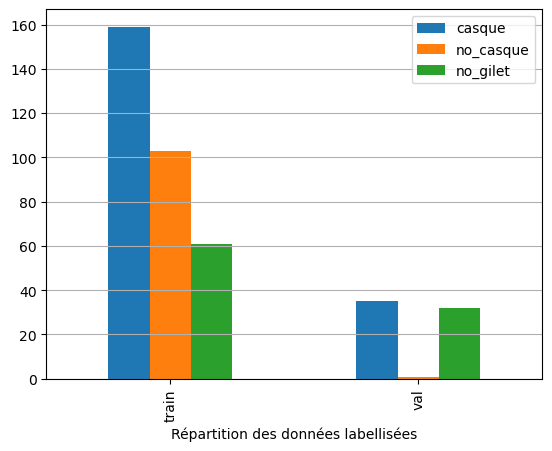

In [168]:
ax = df.plot(kind='bar', ) # figsize=(10, 6))
#ax.grid('off', which='major', axis='x' )
#ax.grid('off', which='major', axis='y' )
ax.set_xlabel("Répartition des données labellisées")
ax.grid('off', which='major', axis='y' )

## Analyse du dataset avec d'origine après labélisation des gilets

In [16]:
file_train = "/home/mld/Documents/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/LABELISATIONS_SAUV/labels_train3.csv"
file_val = "/home/mld/Documents/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/LABELISATIONS_SAUV/labels_val3.csv"
path_train = "/home/mld/Documents/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels/train/"
pathe_val = "/home/mld/Documents/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels/val/"

In [9]:
with open(file_train, "r") as file:
    df_train = pd.read_csv(file)
df_train

In [8]:
with open(file_val, "r") as file:
    df_val = pd.read_csv(file)
df_val

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,casque,201,45,65,104,11_jpg.rf.24ff1255441a11b4fe5b7afec1986508.jpg,416,416
1,NO_gilet,188,151,120,166,11_jpg.rf.24ff1255441a11b4fe5b7afec1986508.jpg,416,416
2,casque,162,14,96,82,12_jpg.rf.74cc4b283fb38b8a6c476981be2c0d83.jpg,416,416
3,gilet,120,100,193,216,12_jpg.rf.74cc4b283fb38b8a6c476981be2c0d83.jpg,416,416
4,NO_gilet,125,228,155,188,19--2-_jpg.rf.7138cf3af584191671c2da3415b5f2a5...,416,416
...,...,...,...,...,...,...,...,...
119,NO_casque,168,33,89,270,5_jpg.rf.8df723a0449fc8958dc165a8fe36a24b.jpg,416,416
120,NO_gilet,106,231,154,185,5_jpg.rf.8df723a0449fc8958dc165a8fe36a24b.jpg,416,416
121,NO_gilet,244,152,166,261,5_jpg.rf.8df723a0449fc8958dc165a8fe36a24b.jpg,416,416
122,casque,172,28,92,161,7_jpg.rf.48004c70b768b4304bf986875c791272.jpg,416,416


In [7]:
df_train['label_name'].value_counts()

casque       134
gilet         97
NO_gilet      93
NO_casque     63
Name: label_name, dtype: int64

In [9]:
df_val['label_name'].value_counts()

NO_gilet     52
casque       40
NO_casque    22
gilet        10
Name: label_name, dtype: int64

## Changement des labels

In [80]:
p="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/test_label/296_jpg.rf.9b310b674ecf50342f98519b7ea53e95.txt"
with open(p, "r+") as file:
    df_txt = pd.read_csv((file), sep=" ", header = None)
    df[0] = df[0].replace()
df_txt

,0,1,2,3,4
0,0,0.570557,0.650697,0.144599,0.134146
1,0,0.424791,0.092112,0.151937,0.131046
2,0,0.165813,0.072457,0.174831,0.137317
3,1,0.727372,0.251680,0.245686,0.308238
4,2,0.694251,0.071429,0.148084,0.139373
5,3,0.366650,0.264270,0.147935,0.288122
6,3,0.115219,0.226640,0.225374,0.249430
7,3,0.600785,0.784930,0.234237,0.204007


In [5]:
p="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/test_label/296_jpg.rf.9b310b674ecf50342f98519b7ea53e95.txt"

file = open(p, "r")
df_txt = pd.read_csv((file), sep=" ", header = None)
df_txt[0] = df_txt[0].replace(1,4).replace(2,1).replace(4,2)
print(df_txt)
file = open(p, "w")
df_txt.to_csv(p, header=None, index=None, sep=' ', mode='w')
file.close()



   0         1         2         3         4
0  0  0.570557  0.650697  0.144599  0.134146
1  0  0.424791  0.092112  0.151937  0.131046
2  0  0.165813  0.072457  0.174831  0.137317
3  2  0.727372  0.251680  0.245686  0.308238
4  1  0.694251  0.071429  0.148084  0.139373
5  3  0.366650  0.264270  0.147935  0.288122
6  3  0.115219  0.226640  0.225374  0.249430
7  3  0.600785  0.784930  0.234237  0.204007


In [15]:
def change_label(path_txt):
    for text in os.listdir(path_txt):
        file = open(join(path_txt,text), "r")
        df_txt = pd.read_csv((file), sep=" ", header = None)
        df_txt[0] = df_txt[0].replace(1,4).replace(2,1).replace(4,2)
        file = open(join(path_txt,text), "w")
        df_txt.to_csv(join(path_txt,text), header=None, index=None, sep=' ', mode='w')
        file.close()
    return df_txt


In [16]:
path="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/test_label/"
        
df = change_label(path)
df

,0,1,2,3,4
0,1,0.600174,0.393728,0.506969,0.752613
1,3,0.599582,0.875348,0.800836,0.249304


In [17]:
path_train="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels/train/"
path_val="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels/val/"

df_train = change_label(path_train)
df_val = change_label(path_val)

In [20]:
df_train3 = read_labels(path_train)
df_train3

,1,2,3,4,0
0,0.475610,0.155052,0.285714,0.257840,0.0
1,0.504027,0.581509,0.687248,0.622948,2.0
2,0.328397,0.156794,0.151568,0.222997,0.0
3,0.524390,0.178571,0.118467,0.175958,0.0
4,0.063589,0.120209,0.092334,0.118467,0.0
...,...,...,...,...,...
382,0.456376,0.748258,0.508852,0.500000,2.0
383,0.621951,0.295961,0.188153,0.371866,0.0
384,0.612813,0.725610,0.420613,0.548780,2.0
385,0.459297,0.401568,0.283497,0.378049,1.0


In [21]:
df_val3 = read_labels(path_val)
df_val3

,1,2,3,4,0
0,0.560105,0.233449,0.155052,0.250871,0.0
1,0.597561,0.561847,0.289199,0.398955,3.0
2,0.506098,0.133275,0.231707,0.196864,0.0
3,0.520195,0.500000,0.463788,0.518106,2.0
4,0.486655,0.773677,0.371638,0.452646,3.0
...,...,...,...,...,...
119,0.511324,0.405052,0.214286,0.649826,1.0
120,0.440155,0.777875,0.370561,0.444250,3.0
121,0.785023,0.678967,0.399314,0.628129,3.0
122,0.523519,0.259582,0.221254,0.386760,0.0


In [22]:
df_train3[0].value_counts()
# 0 = Casque / 1 = NO casque / 2 = Gilet / 3 NO gilet

0.0    134
2.0     97
3.0     93
1.0     63
Name: 0, dtype: int64

In [ ]:
df_train['label_name'].value_counts()

casque       134
gilet         97
NO_gilet      93
NO_casque     63
Name: label_name, dtype: int64

In [23]:
df_val3[0].value_counts()

3.0    52
0.0    40
1.0    22
2.0    10
Name: 0, dtype: int64

In [ ]:
df_val['label_name'].value_counts()

NO_gilet     52
casque       40
NO_casque    22
gilet        10
Name: label_name, dtype: int64

In [32]:
# Comptage des labels avec les 300 images en sus
path_train="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels/train/"
path_val="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels/val/"
df_train300 = read_labels(path_train)
df_val300 = read_labels(path_val)
print(df_train300[0].value_counts())
print(df_val300[0].value_counts())

0.0    728
3.0    661
1.0    211
2.0    181
Name: 0, dtype: int64
3.0    198
0.0    174
1.0     76
2.0     25
Name: 0, dtype: int64


In [25]:
#300 images en sus de Bertrand
path_300images="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels_from_0_to_300/"
df_300images = read_labels(path_300images)
df_300images

,1,2,3,4,0
0,0.910798,0.352113,0.126761,0.169014,0.0
1,0.639671,0.376761,0.077465,0.096244,0.0
2,0.044601,0.396714,0.084507,0.107981,0.0
3,0.247653,0.359155,0.044601,0.070423,0.0
4,0.319249,0.397887,0.075117,0.072770,0.0
...,...,...,...,...,...
1738,0.559859,0.495305,0.044601,0.061033,0.0
1739,0.876761,0.623239,0.237089,0.392019,3.0
1740,0.557512,0.596244,0.096244,0.107981,3.0
1741,0.509367,0.793427,0.299747,0.403756,3.0


In [26]:
df_300images[0].value_counts()

0.0    728
3.0    714
2.0    202
1.0     99
Name: 0, dtype: int64

In [27]:
df_300images = change_label(path_300images)

In [29]:
df_300images = read_labels(path_300images)
df_300images

,1,2,3,4,0
0,0.910798,0.352113,0.126761,0.169014,0.0
1,0.639671,0.376761,0.077465,0.096244,0.0
2,0.044601,0.396714,0.084507,0.107981,0.0
3,0.247653,0.359155,0.044601,0.070423,0.0
4,0.319249,0.397887,0.075117,0.072770,0.0
...,...,...,...,...,...
1738,0.559859,0.495305,0.044601,0.061033,0.0
1739,0.876761,0.623239,0.237089,0.392019,3.0
1740,0.557512,0.596244,0.096244,0.107981,3.0
1741,0.509367,0.793427,0.299747,0.403756,3.0


In [30]:
df_300images[0].value_counts()

0.0    728
3.0    714
1.0    202
2.0     99
Name: 0, dtype: int64

In [6]:
# Ajout en + de bertrand
path_img1="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/plus_image_label/"
df_img1 = read_labels(path_img1)
df_img1[0].value_counts()

2.0    413
1.0    313
0.0    195
3.0     66
Name: 0, dtype: int64

In [9]:
# Ajout en + de bertrand
path_img1="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/plus_image_label/"
df_img1 = read_labels(path_img1)
df_img1[0].value_counts()

1.0    344
2.0    292
3.0    107
0.0     57
Name: 0, dtype: int64

In [8]:
# DATASET
path_train="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels/train/"
path_val="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels/val/"
df1 = read_labels(path_train)
df2 = read_labels(path_val)
df1[0].value_counts(), df2[0].value_counts()


(0.0    897
 3.0    705
 2.0    494
 1.0    413
 Name: 0, dtype: int64,
 3.0    220
 0.0    200
 1.0    187
 2.0    125
 Name: 0, dtype: int64)

In [10]:
# DATASET
path_train="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels/train/"
path_val="C:/Users/Utilisateur/Documents/mld/5_Projets/CAS_PRATIQUE_Verificateur_Uniforme/Dataset/Coco_Format/labels/val/"
df1 = read_labels(path_train)
df2 = read_labels(path_val)
df1[0].value_counts(), df2[0].value_counts()


(0.0    946
 3.0    781
 2.0    723
 1.0    681
 Name: 0, dtype: int64,
 1.0    263
 3.0    251
 0.0    208
 2.0    188
 Name: 0, dtype: int64)

In [170]:
index = ['train','val']
columns = ['casque','no_casque','gilet','no_gilet',]
data = np.array([[946,681,723,781],
                 [208,263,188,251],])
df = pd.DataFrame(data=data,index=index,columns=columns)
df

,casque,no_casque,gilet,no_gilet
train,946,681,723,781
val,208,263,188,251


In [176]:
df.sum(axis=1)

train    3131
val       910
dtype: int64

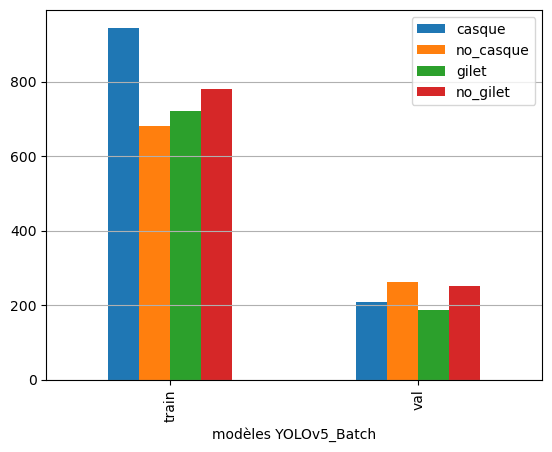

In [171]:
ax = df.plot(kind='bar', ) # figsize=(10, 6))
#ax.grid('off', which='major', axis='x' )
#ax.grid('off', which='major', axis='y' )
ax.set_xlabel("modèles YOLOv5_Batch")
ax.grid('off', which='major', axis='y' )

# Analyse des résultats des entraintements sur 300 epoch

In [27]:
path_result = "../Models/data_aug_low/"

In [74]:
d = "../Models/data_aug_low/mod_yolov5l/mod_yolov5l_b16_e300/results.csv"
pd.read_csv((d), sep=",", index_col=0)

,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
epoch,,,,,,,,,,,,,
0,0.088339,0.075177,0.042591,0.18254,0.42066,0.19916,0.059424,0.060308,0.059700,0.035336,0.070732,0.003252,0.003252
1,0.070174,0.060546,0.033674,0.18595,0.44349,0.19238,0.065144,0.062150,0.035792,0.028098,0.040710,0.006564,0.006564
2,0.069611,0.047607,0.029223,0.28621,0.63583,0.36383,0.138590,0.056266,0.030556,0.025314,0.010666,0.009853,0.009853
3,0.061605,0.046974,0.025260,0.41919,0.50981,0.39105,0.137930,0.055229,0.032399,0.018659,0.009901,0.009901,0.009901
4,0.054671,0.044743,0.018223,0.48688,0.75907,0.59647,0.230100,0.045603,0.029969,0.012781,0.009901,0.009901,0.009901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.008401,0.012862,0.000431,0.89386,0.83531,0.87534,0.584960,0.028053,0.044291,0.010101,0.000298,0.000298,0.000298
296,0.008439,0.013193,0.000447,0.89619,0.83216,0.87520,0.584380,0.028043,0.044353,0.010045,0.000265,0.000265,0.000265
297,0.008655,0.014138,0.000452,0.88149,0.84210,0.87698,0.586000,0.028017,0.044374,0.009947,0.000232,0.000232,0.000232


In [192]:
list_df = []
list_max = []
list_epoch = []
list_moy5max = []

for N1 in os.listdir(path_result):
    dir_N1 = join(path_result, N1)
    if os.path.isdir(dir_N1):
        for N2 in os.listdir(dir_N1):
            try:
                df = pd.read_csv((join(dir_N1, N2, 'results.csv')), sep=",", index_col=0)
                df.columns = df.columns.str.replace('/', '_').str.replace('.', '_').str.replace(':', '_').str.replace(' ', '')
                globals()['df_%s' % N2] = df
                list_df.append(f'df_{N2}')
                val_max = df['metrics_mAP_0_5'].max()
                list_max.append(val_max) 
                epoch = df['metrics_mAP_0_5'].idxmax()+1
                list_epoch.append(epoch)
                moy_5max = df['metrics_mAP_0_5'].sort_values(ascending=False).head(5).mean().round(5)
                list_moy5max.append(moy_5max)

            except:
                continue  

print(list_df)
print(list_max)
print(list_moy5max)
# print(f'df_{N2}',': metrix max =' ,val_max, ", epoch =",f"{df['metrics_mAP_0_5'].idxmax()+1}e")

['df_mod_yolov5l_b16_e300', 'df_mod_yolov5l_b8_e300', 'df_mod_yolov5m_b16_e300', 'df_mod_yolov5m_b32_e300', 'df_mod_yolov5m_b8_e300', 'df_mod_yolov5s_b16_e300', 'df_mod_yolov5s_b32_e300', 'df_mod_yolov5s_b64_e300', 'df_mod_yolov5s_b8_e300', 'df_mod_yolov5x_b16_e230', 'df_mod_yolov5x_b8_e240']
[0.89528, 0.89425, 0.89394, 0.88871, 0.89331, 0.88046, 0.87407, 0.87152, 0.87556, 0.90003, 0.89639]
[0.89111, 0.89091, 0.89007, 0.88275, 0.8894, 0.87533, 0.87252, 0.86357, 0.8735, 0.89073, 0.88988]


In [196]:
sort_val = np.argsort(-np.array(list_max))

for i in sort_val:
    # print(i)
    print(f"index {i},{list_df[i]}: val max ={list_max[i]}, moyenne des 5 max={list_moy5max[i]}, epoch ={list_epoch[i]}e")


index 9,df_mod_yolov5x_b16_e230: val max =0.90003, moyenne des 5 max=0.89073, epoch =10e
index 10,df_mod_yolov5x_b8_e240: val max =0.89639, moyenne des 5 max=0.88988, epoch =17e
index 0,df_mod_yolov5l_b16_e300: val max =0.89528, moyenne des 5 max=0.89111, epoch =29e
index 1,df_mod_yolov5l_b8_e300: val max =0.89425, moyenne des 5 max=0.89091, epoch =54e
index 2,df_mod_yolov5m_b16_e300: val max =0.89394, moyenne des 5 max=0.89007, epoch =74e
index 4,df_mod_yolov5m_b8_e300: val max =0.89331, moyenne des 5 max=0.8894, epoch =34e
index 3,df_mod_yolov5m_b32_e300: val max =0.88871, moyenne des 5 max=0.88275, epoch =56e
index 5,df_mod_yolov5s_b16_e300: val max =0.88046, moyenne des 5 max=0.87533, epoch =18e
index 8,df_mod_yolov5s_b8_e300: val max =0.87556, moyenne des 5 max=0.8735, epoch =61e
index 6,df_mod_yolov5s_b32_e300: val max =0.87407, moyenne des 5 max=0.87252, epoch =48e
index 7,df_mod_yolov5s_b64_e300: val max =0.87152, moyenne des 5 max=0.86357, epoch =34e


In [194]:
np.argsort(-np.array(list_max))

array([ 9, 10,  0,  1,  2,  4,  3,  5,  8,  6,  7], dtype=int64)

In [158]:
df_mod_yolov5l_b16_e300['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
28    0.89528
22    0.89164
52    0.89141
11    0.88934
23    0.88790
Name: metrics_mAP_0_5, dtype: float64

In [159]:
df_mod_yolov5l_b8_e300['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
53    0.89425
51    0.89126
16    0.89124
52    0.89005
28    0.88777
Name: metrics_mAP_0_5, dtype: float64

In [160]:
df_mod_yolov5m_b16_e300['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
73    0.89394
79    0.89020
75    0.88904
28    0.88872
17    0.88846
Name: metrics_mAP_0_5, dtype: float64

In [161]:
df_mod_yolov5m_b32_e300['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
55    0.88871
33    0.88192
66    0.88157
23    0.88138
39    0.88017
Name: metrics_mAP_0_5, dtype: float64

In [162]:
df_mod_yolov5m_b8_e300['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
33    0.89331
23    0.89157
16    0.89136
12    0.88636
52    0.88441
Name: metrics_mAP_0_5, dtype: float64

In [163]:
df_mod_yolov5s_b16_e300['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
17     0.88046
37     0.87809
42     0.87345
28     0.87243
100    0.87220
Name: metrics_mAP_0_5, dtype: float64

In [164]:
df_mod_yolov5s_b32_e300['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
47     0.87407
135    0.87324
74     0.87208
64     0.87168
65     0.87152
Name: metrics_mAP_0_5, dtype: float64

In [165]:
df_mod_yolov5s_b64_e300['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
33     0.87152
56     0.86497
146    0.86189
122    0.85997
118    0.85951
Name: metrics_mAP_0_5, dtype: float64

In [166]:
df_mod_yolov5s_b8_e300['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
60     0.87556
35     0.87526
155    0.87316
30     0.87216
197    0.87137
Name: metrics_mAP_0_5, dtype: float64

In [167]:
df_mod_yolov5x_b16_e230['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
9     0.90003
14    0.88957
30    0.88854
16    0.88807
24    0.88745
Name: metrics_mAP_0_5, dtype: float64

In [168]:
df_mod_yolov5x_b8_e240['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
16    0.89639
9     0.89001
72    0.88788
38    0.88778
78    0.88732
Name: metrics_mAP_0_5, dtype: float64

In [169]:
df_mod_yolov5x_b8_e240

,train_box_loss,train_obj_loss,train_cls_loss,metrics_precision,metrics_recall,metrics_mAP_0_5,metrics_mAP_0_5_0_95,val_box_loss,val_obj_loss,val_cls_loss,x_lr0,x_lr1,x_lr2
epoch,,,,,,,,,,,,,
0,0.088488,0.073786,0.041819,0.24124,0.35700,0.22427,0.070107,0.060218,0.052543,0.034701,0.070370,0.003292,0.003292
1,0.069510,0.060215,0.031332,0.28280,0.40615,0.24357,0.084977,0.067536,0.035215,0.027052,0.040343,0.006598,0.006598
2,0.068285,0.047291,0.024479,0.57804,0.43923,0.42266,0.167760,0.058065,0.033982,0.020372,0.010288,0.009877,0.009877
3,0.062957,0.045690,0.018048,0.37318,0.71259,0.54135,0.213580,0.057538,0.032759,0.013551,0.009876,0.009876,0.009876
4,0.056278,0.044489,0.012538,0.56508,0.78258,0.73814,0.364550,0.044993,0.031504,0.010565,0.009876,0.009876,0.009876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.009163,0.013687,0.000558,0.88728,0.84540,0.88120,0.586660,0.028816,0.047210,0.010319,0.000347,0.000347,0.000347
236,0.008426,0.012681,0.000397,0.89372,0.84187,0.88080,0.584820,0.028873,0.047084,0.010279,0.000306,0.000306,0.000306
237,0.008927,0.013411,0.000540,0.89855,0.84038,0.88151,0.583710,0.028800,0.046899,0.010391,0.000265,0.000265,0.000265


# Analyse des résultats du train avec HIGH data aug

In [3]:
path_result_high = "../Models/data_aug_high/"

In [21]:
list_df_high = []
list_max_high = []
list_epoch_high = []
list_moy5max_high = []

for N1 in os.listdir(path_result_high):
    dir_N1 = join(path_result_high, N1)
    if os.path.isdir(dir_N1):
        for N2 in os.listdir(dir_N1):
            try:
                df = pd.read_csv((join(dir_N1, N2, 'results.csv')), sep=",", index_col=0)
                df.columns = df.columns.str.replace('/', '_').str.replace('.', '_').str.replace(':', '_').str.replace(' ', '')
                globals()['df_high_%s' % N2] = df
                list_df_high.append(f'df_{N2}')
                val_max = df['metrics_mAP_0_5'].max()
                list_max_high.append(val_max) 
                epoch = df['metrics_mAP_0_5'].idxmax()+1
                list_epoch_high.append(epoch)
                moy_5max = round(df['metrics_mAP_0_5'].sort_values(ascending=False).head(5).mean(),5)
                # print(moy_5max)
                list_moy5max_high.append(moy_5max)

            except:
                continue  

print(list_df_high)
print(list_epoch_high)
print(list_max_high)
print(list_moy5max_high)
# print(f'df_{N2}',': metrix max =' ,val_max, ", epoch =",f"{df['metrics_mAP_0_5'].idxmax()+1}e")


['df_mod_yolov5l_b16_e75', 'df_mod_yolov5l_b8_e75', 'df_mod_yolo5m_b16_e100', 'df_mod_yolo5m_b32_e100', 'df_mod_yolo5m_b8_e100', 'df_mod_yolo5s_b16_e150', 'df_mod_yolo5s_b32_e150', 'df_mod_yolo5s_b64_e150', 'df_mod_yolo5s_b8_e150', 'df_mod_yolov5x_b16_e50', 'df_mod_yolov5x_b8_e75']
[21, 57, 44, 36, 53, 109, 106, 109, 97, 37, 23]
[0.90919, 0.90852, 0.90252, 0.89981, 0.90301, 0.89729, 0.89403, 0.88717, 0.89662, 0.91069, 0.91006]
[0.90475, 0.90731, 0.8993, 0.89682, 0.89803, 0.89517, 0.88893, 0.88467, 0.89446, 0.90596, 0.9056]


In [22]:
sort_val_high = np.argsort(-np.array(list_max_high))

for i in sort_val_high:
    # print(i)
    print(f"index {i},{list_df_high[i]}: val max ={list_max_high[i]}, moyenne des 5 max={list_moy5max_high[i]}, epoch ={list_epoch_high[i]}e")

np.argsort(-np.array(list_max_high))


index 9,df_mod_yolov5x_b16_e50: val max =0.91069, moyenne des 5 max=0.90596, epoch =37e
index 10,df_mod_yolov5x_b8_e75: val max =0.91006, moyenne des 5 max=0.9056, epoch =23e
index 0,df_mod_yolov5l_b16_e75: val max =0.90919, moyenne des 5 max=0.90475, epoch =21e
index 1,df_mod_yolov5l_b8_e75: val max =0.90852, moyenne des 5 max=0.90731, epoch =57e
index 4,df_mod_yolo5m_b8_e100: val max =0.90301, moyenne des 5 max=0.89803, epoch =53e
index 2,df_mod_yolo5m_b16_e100: val max =0.90252, moyenne des 5 max=0.8993, epoch =44e
index 3,df_mod_yolo5m_b32_e100: val max =0.89981, moyenne des 5 max=0.89682, epoch =36e
index 5,df_mod_yolo5s_b16_e150: val max =0.89729, moyenne des 5 max=0.89517, epoch =109e
index 8,df_mod_yolo5s_b8_e150: val max =0.89662, moyenne des 5 max=0.89446, epoch =97e
index 6,df_mod_yolo5s_b32_e150: val max =0.89403, moyenne des 5 max=0.88893, epoch =106e
index 7,df_mod_yolo5s_b64_e150: val max =0.88717, moyenne des 5 max=0.88467, epoch =109e


array([ 9, 10,  0,  1,  4,  2,  3,  5,  8,  6,  7], dtype=int64)

In [ ]:
300 epoch data_aug low
index 9,df_mod_yolov5x_b16_e230: val max =0.90003, moyenne des 5 max=0.89073, epoch =10e
index 10,df_mod_yolov5x_b8_e240: val max =0.89639, moyenne des 5 max=0.88988, epoch =17e
index 0,df_mod_yolov5l_b16_e300: val max =0.89528, moyenne des 5 max=0.89111, epoch =29e
index 1,df_mod_yolov5l_b8_e300: val max =0.89425, moyenne des 5 max=0.89091, epoch =54e
index 2,df_mod_yolov5m_b16_e300: val max =0.89394, moyenne des 5 max=0.89007, epoch =74e
index 4,df_mod_yolov5m_b8_e300: val max =0.89331, moyenne des 5 max=0.8894, epoch =34e
index 3,df_mod_yolov5m_b32_e300: val max =0.88871, moyenne des 5 max=0.88275, epoch =56e
index 5,df_mod_yolov5s_b16_e300: val max =0.88046, moyenne des 5 max=0.87533, epoch =18e
index 8,df_mod_yolov5s_b8_e300: val max =0.87556, moyenne des 5 max=0.8735, epoch =61e
index 6,df_mod_yolov5s_b32_e300: val max =0.87407, moyenne des 5 max=0.87252, epoch =48e
index 7,df_mod_yolov5s_b64_e300: val max =0.87152, moyenne des 5 max=0.86357, epoch =34e

In [26]:
df_high_mod_yolo5m_b16_e100['metrics_mAP_0_5'].sort_values(ascending=False).head(5)

               epoch
43    0.90252
57    0.89960
58    0.89924
45    0.89801
72    0.89715
Name: metrics_mAP_0_5, dtype: float64

# Matrices de confusion

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
matrix_conf_ori = np.array([[50,0,np.nan],[2,51,np.nan],[np.nan,np.nan,21],[np.nan,np.nan,63]])
matrix_conf_ori

array([[50.,  0., nan],
       [ 2., 51., nan],
       [nan, nan, 21.],
       [nan, nan, 63.]])

<AxesSubplot:>

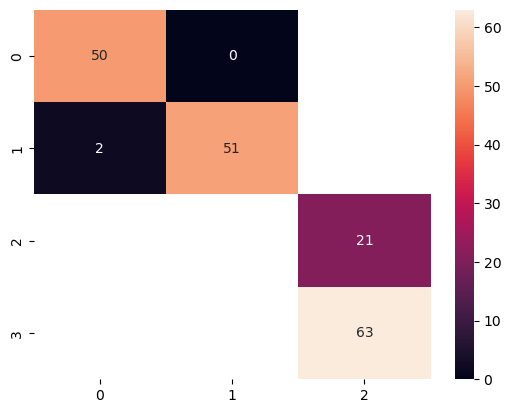

In [37]:
sns.heatmap(matrix_conf_ori, annot=True)

Text(0.5, 23.38159722222222, 'Réels')

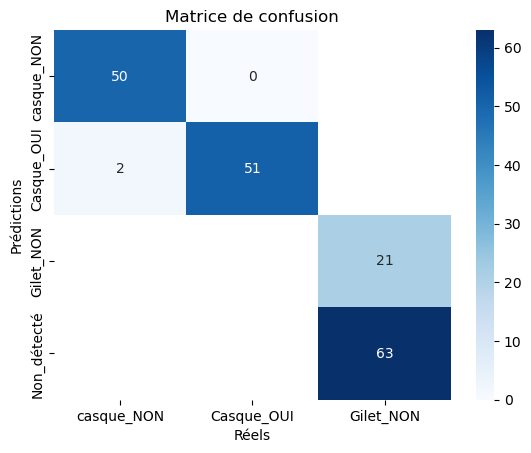

In [48]:
#sns.heatmap(matrix_conf_ori, annot=True)
x_axis_labels = ["casque_NON","Casque_OUI","Gilet_NON" ] # labels for x-axis
y_axis_labels = ["casque_NON","Casque_OUI","Gilet_NON","Non_détecté"] # labels for y-axis
sns.heatmap(matrix_conf_ori, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Prédictions')
plt.xlabel('Réels')


Text(0.5, 23.38159722222222, 'Réels')

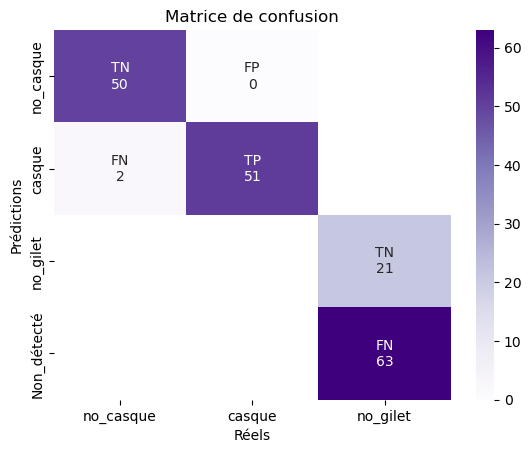

In [69]:
#sns.heatmap(matrix_conf_ori, annot=True)
x_axis_labels = ["no_casque","casque","no_gilet" ] # labels for x-axis
y_axis_labels = ["no_casque","casque","no_gilet","Non_détecté"] # labels for y-axis
group_names = ['TN','FP','','FN','TP','','','','TN','','','FN']
group_counts = ["{0:0.0f}".format(value) for value in matrix_conf_ori.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(4,3)
sns.heatmap(matrix_conf_ori, annot=labels, fmt="", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='Purples')
#sns.heatmap(matrix_conf_ori, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Prédictions')
plt.xlabel('Réels')


[['TN' 'FP' '']
 ['FN' 'TP' '']
 ['' '' 'TN']
 ['' '' 'FN']]


<AxesSubplot:>

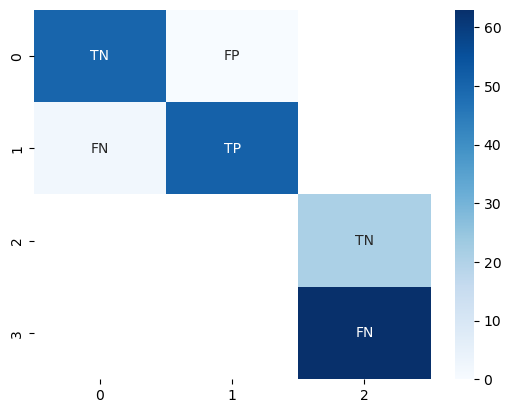

In [18]:
labels = ['TN','FP','','FN','TP','','','','TN','','','FN']
labels = np.asarray(labels).reshape(4,3)
print(labels)
sns.heatmap(matrix_conf_ori, annot=labels, fmt='', cmap='Blues')


<AxesSubplot:>

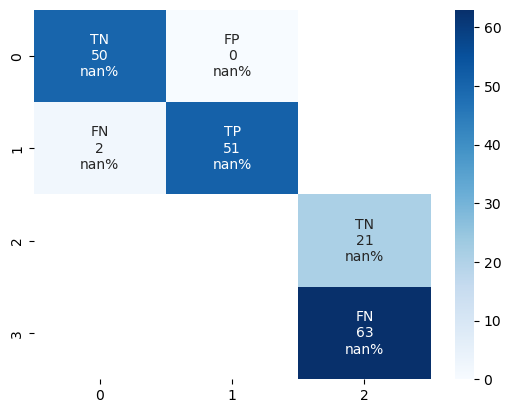

In [24]:

group_names = ['TN','FP','','FN','TP','','','','TN','','','FN']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix_conf_ori.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix_conf_ori.flatten()/np.sum(matrix_conf_ori)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(4,3)
sns.heatmap(matrix_conf_ori, annot=labels, fmt="", cmap='Blues')

- **Matrice de confusion sur modèle réalisé**

In [70]:
matrix_conf_ori = np.array([[33,1,np.nan,np.nan],[0,36,np.nan,np.nan],[np.nan,np.nan,24,1],[np.nan,np.nan,0,33]])
matrix_conf_ori

array([[33.,  1., nan, nan],
       [ 0., 36., nan, nan],
       [nan, nan, 24.,  1.],
       [nan, nan,  0., 33.]])

Text(0.5, 23.38159722222222, 'Réels')

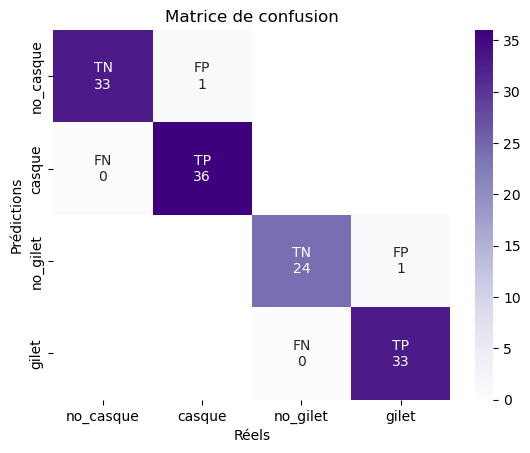

In [72]:
#sns.heatmap(matrix_conf_ori, annot=True)
x_axis_labels = ["no_casque","casque","no_gilet",'gilet' ] # labels for x-axis
y_axis_labels = ["no_casque","casque","no_gilet","gilet"] # labels for y-axis
group_names = ['TN','FP','','','FN','TP','','','','','TN','FP','','','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix_conf_ori.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(4,4)
sns.heatmap(matrix_conf_ori, annot=labels, fmt="", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='Purples')
#sns.heatmap(matrix_conf_ori, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Prédictions')
plt.xlabel('Réels')


# Comparaison des modèles

In [74]:
index = ['v5s_b8','v5s_b16','v5s_b32','v5s_b64',
         'v5m_b8','v5m_b16','v5m_b32',
         'v5l_b8','v5l_b16',
         'v5x_b8','v5x_b16']
columns = ['All','casque','no_casque','gilet','no_gilet']
data = np.array([[ 0.875,  0.826,  0.922,  0.973, 0.778], #v5s_b8
                 [ 0.859,  0.793,  0.894,  0.947, 0.672], #v5s_b16
                 [ 0.882,  0.827,  0.92,  0.97, 0.811],   #v5s_b32
                 [ 0.856,  0.784,  0.907,  0.961, 0.774], #v5s_b64
                 [ 0.,  0.,  0.,  0., 0.], #v5m_b8
                 [ 0.,  0.,  0.,  0., 0.], #v5m_b16
                 [ 0.,  0.,  0.,  0., 0.], #v5m_b32
                 [ 0.,  0.,  0.,  0., 0.], #v5l_b8
                 [ 0.,  0.,  0.,  0., 0.], #v5l_b16
                 [ 0.88,  0.871,  0.918,  0.956, 0.777], #v5x_b8
                 [ 0.875,  0.849,  0.935,  0.945, 0.772], #v5x_b16

                ])

In [76]:
df_mod = pd.DataFrame(data=data,index=index,columns=columns)
df_mod

,All,casque,no_casque,gilet,no_gilet
v5s_b8,0.875,0.826,0.922,0.973,0.778
v5s_b16,0.859,0.793,0.894,0.947,0.672
v5s_b32,0.882,0.827,0.920,0.970,0.811
v5s_b64,0.856,0.784,0.907,0.961,0.774


<AxesSubplot:>

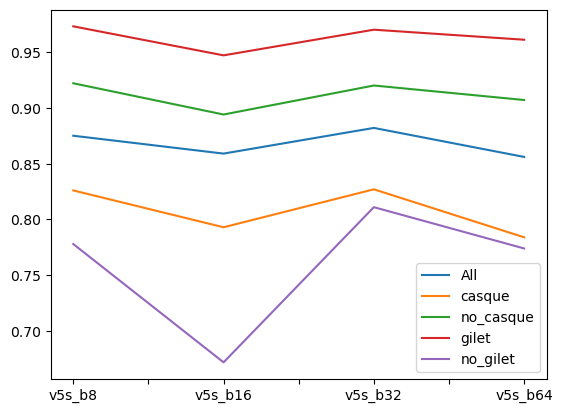

In [79]:
df_mod.plot()

In [155]:
index = ['v5s_b8','v5s_b16','v5s_b32','v5s_b64',
         'v5m_b8','v5m_b16','v5m_b32',
         'v5l_b8','v5l_b16',
         'v5x_b8','v5x_b16']
columns = ['train mAP50','val mAP50','casque','no_casque','gilet','no_gilet',]
data = np.array([[0.87556, 0.875,  0.826,  0.922,  0.973, 0.778, ], #v5s_b8
                 [0.88046, 0.859,  0.793,  0.894,  0.947, 0.672, ], #v5s_b16
                 [0.87407, 0.882,  0.827,  0.92,  0.97, 0.811, ],   #v5s_b32
                 [0.87152, 0.856,  0.784,  0.907,  0.961, 0.774, ], #v5s_b64
                 [0.89331, 0.88,  0.839,  0.916,  0.965, 0.799, ], #v5m_b8
                 [0.89394, 0.874,  0.838,  0.914,  0.971, 0.773,], #v5m_b16
                 [0.88871, 0.869,  0.839,  0.906,  0.964, 0.766,], #v5m_b32
                 [0.89425, 0.876,  0.84,  0.924,  0.965, 0.775, ], #v5l_b8
                 [0.89528, 0.877,  0.838,  0.93,  0.968, 0.771, ], #v5l_b16
                 [0.89639, 0.88,  0.871,  0.918,  0.956, 0.777, ], #v5x_b8
                 [0.90003, 0.875,  0.849,  0.935,  0.945, 0.772,], #v5x_b16
                ])
df_mod = pd.DataFrame(data=data,index=index,columns=columns)
df_mod

,train mAP50,val mAP50,casque,no_casque,gilet,no_gilet
v5s_b8,0.87556,0.875,0.826,0.922,0.973,0.778
v5s_b16,0.88046,0.859,0.793,0.894,0.947,0.672
v5s_b32,0.87407,0.882,0.827,0.920,0.970,0.811
v5s_b64,0.87152,0.856,0.784,0.907,0.961,0.774
v5m_b8,0.89331,0.880,0.839,0.916,0.965,0.799
v5m_b16,0.89394,0.874,0.838,0.914,0.971,0.773
v5m_b32,0.88871,0.869,0.839,0.906,0.964,0.766
v5l_b8,0.89425,0.876,0.840,0.924,0.965,0.775
v5l_b16,0.89528,0.877,0.838,0.930,0.968,0.771
v5x_b8,0.89639,0.880,0.871,0.918,0.956,0.777


([<matplotlib.axis.XTick at 0x16187c0d190>,
 [Text(0, 0, 'v5s_b8'),
  Text(1, 0, 'v5s_b16'),
  Text(2, 0, 'v5s_b32'),
  Text(3, 0, 'v5s_b64'),
  Text(4, 0, 'v5m_b8'),
  Text(5, 0, 'v5m_b16'),
  Text(6, 0, 'v5m_b32'),
  Text(7, 0, 'v5l_b8'),
  Text(8, 0, 'v5l_b16'),
  Text(9, 0, 'v5x_b8'),
  Text(10, 0, 'v5x_b16')])

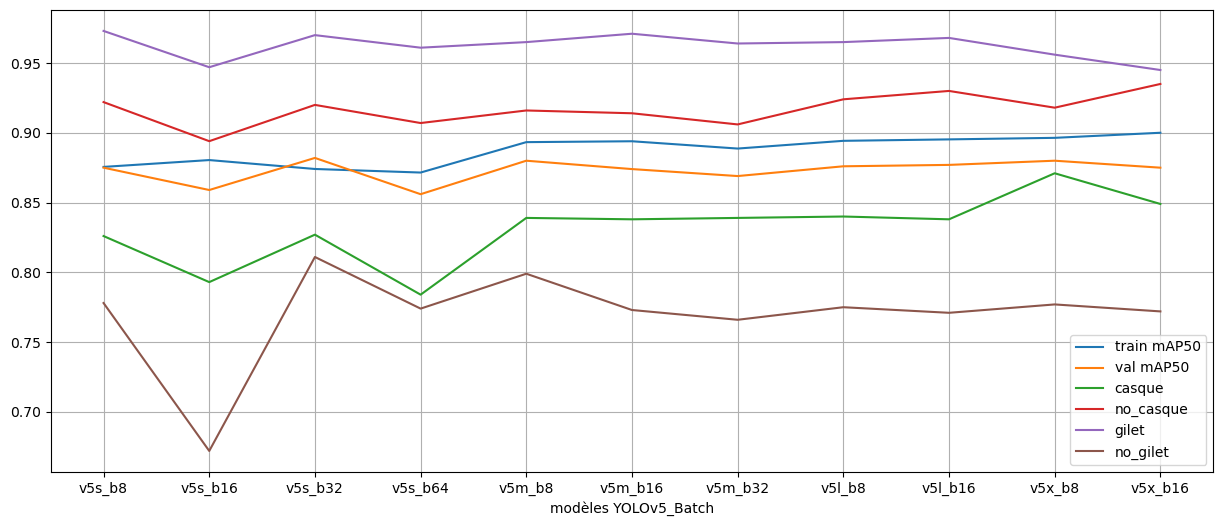

In [159]:
ax = df_mod.plot(figsize=(15, 6))
ax.grid('off', which='major', axis='x' )
ax.grid('off', which='major', axis='y' )
ax.set_xlabel("modèles YOLOv5_Batch")
plt.xticks(range(0,len(df_mod.index)), df_mod.index)

- Comparatifs modèls

In [180]:
dir1 = "../Models/yolov5m_b16_e300_hyp_med/"
df = pd.read_csv((join(dir1, 'results.csv')), sep=",", index_col=0)
df.columns = df.columns.str.replace('/', '_').str.replace('.', '_').str.replace(':', '_').str.replace(' ', '')
val_max = df['metrics_mAP_0_5'].max()
epoch = df['metrics_mAP_0_5'].idxmax()+1
moy_5max = round(df['metrics_mAP_0_5'].sort_values(ascending=False).head(5).mean(),5)
print(f"yolov5m_b16_e300_hyp_med: val max ={val_max}, moyenne des 5 max={moy_5max}, epoch ={epoch}e")


yolov5m_b16_e300_hyp_med: val max =0.89814, moyenne des 5 max=0.8938, epoch =44e


In [200]:
dir1 = "../Models/yolov5m_b16_e300_hyp_high/"
df = pd.read_csv((join(dir1, 'results.csv')), sep=",", index_col=0)
df.columns = df.columns.str.replace('/', '_').str.replace('.', '_').str.replace(':', '_').str.replace(' ', '')
val_max = df['metrics_mAP_0_5'].max()
epoch = df['metrics_mAP_0_5'].idxmax()+1
moy_5max = round(df['metrics_mAP_0_5'].sort_values(ascending=False).head(5).mean(),5)
print(f"yolov5m_b16_e300_hyp_high: val max ={val_max}, moyenne des 5 max={moy_5max}, epoch ={epoch}e")


yolov5m_b16_e300_hyp_med: val max =0.89814, moyenne des 5 max=0.8938, epoch =44e


In [181]:
dir1 = "../Models/data_aug_high/yolov5m/mod_yolo5m_b16_e100/"
df = pd.read_csv((join(dir1, 'results.csv')), sep=",", index_col=0)
df.columns = df.columns.str.replace('/', '_').str.replace('.', '_').str.replace(':', '_').str.replace(' ', '')
val_max = df['metrics_mAP_0_5'].max()
epoch = df['metrics_mAP_0_5'].idxmax()+1
moy_5max = round(df['metrics_mAP_0_5'].sort_values(ascending=False).head(5).mean(),5)
print(f"yolov5m_b16_e300_hyp_med: val max ={val_max}, moyenne des 5 max={moy_5max}, epoch ={epoch}e")


yolov5m_b16_e300_hyp_med: val max =0.90252, moyenne des 5 max=0.8993, epoch =44e


In [192]:
index = ['v5s_b8','v5s_b16','v5s_b32','v5s_b64','v5m_b8',
         'v5m_b16','v5m_b32',
         'v5l_b8','v5l_b16','v5x_b8','v5x_b16']
columns = ['mAP50_train','mAP50_val','precision_val', 'recall_val']
data = np.array([[0.87556, 0.875, 0.877, 0.831], #v5s_b8
                 [0.88046, 0.859, 0.872, 0.826], #v5s_b16
                 [0.87407, 0.882, 0.893, 0.828],   #v5s_b32
                 [0.87152, 0.856, 0.889, 0.809], #v5s_b64
                 [0.89331, 0.88,  0.884,  0.85], #v5m_b8
                 [0.89394, 0.874, 0.904, 0.817], #v5m_b16
                 [0.88871, 0.869, 0.895, 0.818], #v5m_b32
                 [0.89425, 0.876, 0.889, 0.841], #v5l_b8
                 [0.89528, 0.877, 0.883, 0.844], #v5l_b16
                 [0.89639, 0.88,  0.88,  0.848], #v5x_b8
                 [0.90003, 0.875, 0.83,  0.859], #v5x_b16
                ])
df_mod = pd.DataFrame(data=data,index=index,columns=columns)
df_mod

,mAP50_train,mAP50_val,precision_val,recall_val
v5s_b8,0.87556,0.875,0.877,0.831
v5s_b16,0.88046,0.859,0.872,0.826
v5s_b32,0.87407,0.882,0.893,0.828
v5s_b64,0.87152,0.856,0.889,0.809
v5m_b8,0.89331,0.880,0.884,0.850
v5m_b16,0.89394,0.874,0.904,0.817
v5m_b32,0.88871,0.869,0.895,0.818
v5l_b8,0.89425,0.876,0.889,0.841
v5l_b16,0.89528,0.877,0.883,0.844
v5x_b8,0.89639,0.880,0.880,0.848


([<matplotlib.axis.XTick at 0x1618c37a2e0>,
 [Text(0, 0, 'v5s_b8'),
  Text(1, 0, 'v5s_b16'),
  Text(2, 0, 'v5s_b32'),
  Text(3, 0, 'v5s_b64'),
  Text(4, 0, 'v5m_b8'),
  Text(5, 0, 'v5m_b16'),
  Text(6, 0, 'v5m_b32'),
  Text(7, 0, 'v5l_b8'),
  Text(8, 0, 'v5l_b16'),
  Text(9, 0, 'v5x_b8'),
  Text(10, 0, 'v5x_b16')])

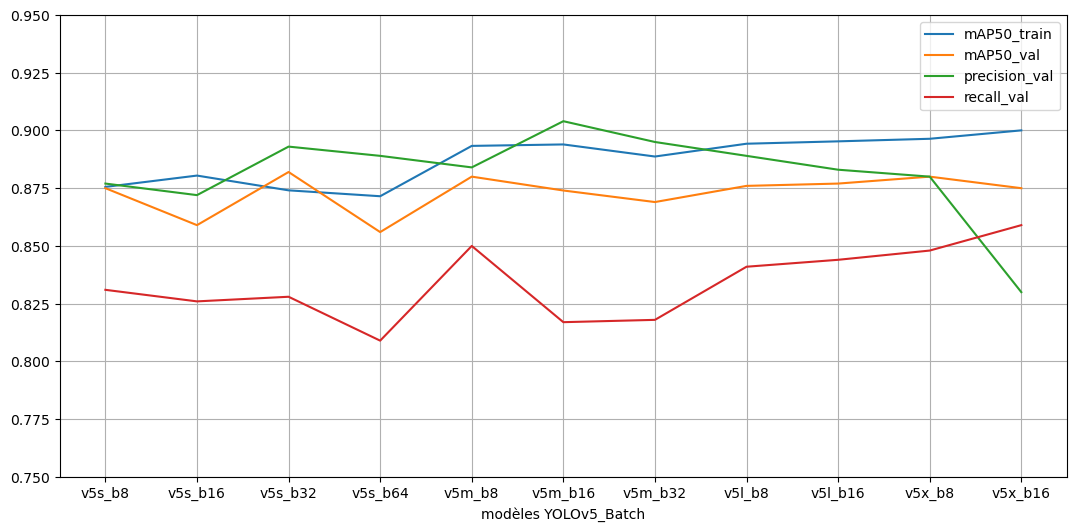

In [198]:
ax = df_mod.plot(figsize=(13, 6), ylim=(0.75, 0.95))
ax.grid('off', which='major', axis='x' )
ax.grid('off', which='major', axis='y' )
ax.set_xlabel("modèles YOLOv5_Batch")
plt.xticks(range(0,len(df_mod.index)), df_mod.index)

In [201]:
index = ['v5m_b16_hyp=low','v5m_b16_hyp=med','v5m_b16_hyp=high']
columns = ['mAP50_train','mAP50_val','precision_val', 'recall_val']
data = np.array([[0.89394, 0.874, 0.904, 0.817], #v5m_b16_hyp=low
                 [0.89814, 0.892, 0.913,  0.83], #v5m_b16_hyp=med
                 [0.89814, 0.892, 0.913, 0.83], #v5m_b16_hyp=hyp
                ])
df_mod = pd.DataFrame(data=data,index=index,columns=columns)
df_mod

,mAP50_train,mAP50_val,precision_val,recall_val
v5m_b16_hyp=low,0.89394,0.874,0.904,0.817
v5m_b16_hyp=med,0.89814,0.892,0.913,0.830
v5m_b16_hyp=high,0.89814,0.892,0.913,0.830


([<matplotlib.axis.XTick at 0x16190934730>,
 [Text(0, 0, 'v5m_b16_hyp=low'),
  Text(1, 0, 'v5m_b16_hyp=med'),
  Text(2, 0, 'v5m_b16_hyp=high')])

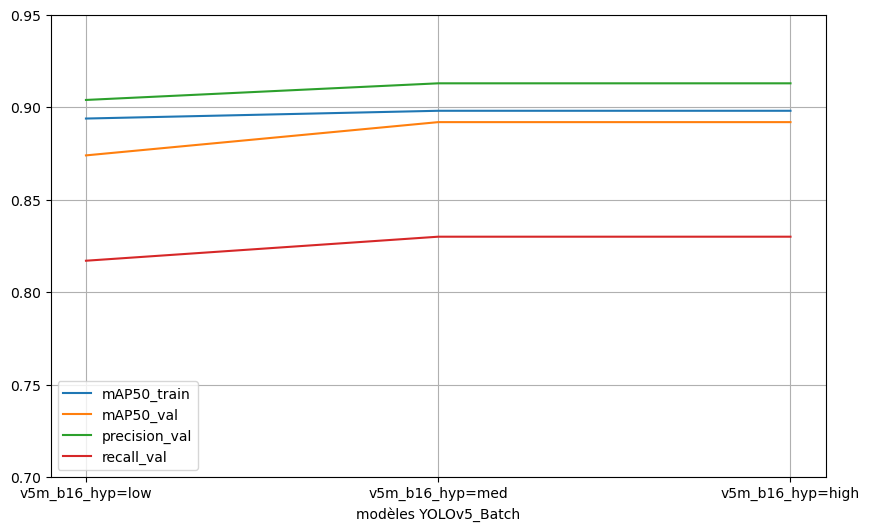

In [203]:
ax = df_mod.plot(figsize=(10, 6), ylim=(0.7, 0.95))
ax.grid('off', which='major', axis='x' )
ax.grid('off', which='major', axis='y' )
ax.set_xlabel("modèles YOLOv5_Batch")
plt.xticks(range(0,len(df_mod.index)), df_mod.index)

In [130]:
print(df_mod_yolov5s_b8_e300.columns)

Index(['train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       'x/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')


In [132]:
df_mod_yolov5s_b8_e300['metrics/mAP_0.5']

               epoch
0      0.12386
1      0.23374
2      0.23677
3      0.38331
4      0.55422
        ...   
251    0.85349
252    0.85600
253    0.85653
254    0.85241
255    0.85021
Name: metrics/mAP_0.5, Length: 256, dtype: float64

In [101]:
df_mod_yolov5l_b16_e300['epoch']

KeyError: 'epoch'

In [36]:
for k in range(5):
    exec(f'cat_{k} = k*2')


In [42]:
cat_4

8

In [41]:
for x in range(0, 5):
    globals()['string%s' % x] = 'Hello'


In [43]:
string3

'Hello'

In [ ]:
df_txt = pd.read_csv((file), sep=" ", header = None)
dir_N0 = os.listdir(folder_dataset)

# Boucle 1 sur dossier train
for n, N1 in tqdm(enumerate(dir_N0), total=len(dir_N0)):
    folder_N1 = join(folder_dataset,N1)

    # Boucle 2 sur sous_dossier 1, si le sous-dossier est un dossier sinon erreur 
    if os.path.isdir(folder_N1):
        
        for n, N2 in enumerate(os.listdir(folder_N1)):                     
            if N2 == ss_folder2[0]:
                for n, file in enumerate(os.listdir(join(folder_N1,N2))):
                    file_dir = join(folder_N1,N2,file)
                    if file.endswith('.ply'): 
                        matrix = read_extract_data_plyfile(file_dir)
                        data_dynamic = np.concatenate((data_dynamic,matrix), axis=0)   
                    else:
                        continue

## Attribution couleurs

In [45]:
colors = np.random.uniform(0, 255, size=(2, 3))
color = colors[int(1.0) % len(colors)]
colors, len(colors), color


(array([[184.85941784,  57.72402859, 155.29193107],
        [229.22199702, 123.85838608,  15.92496989]]),
 2,
 array([229.22199702, 123.85838608,  15.92496989]))

In [61]:
v = [0,1,2,3]
v[3 % 2], 3/4

(1, 0.75)

In [64]:
0%2, 1%2, 2%2, 3%2

(0, 1, 0, 1)

In [ ]:
label = [0,1,2,3]
colors = np.array([[0.0, 255.0,0.0],[0.0,0.0,255.0]])
color0 = colors[int(0) % len(colors)]
color1 = colors[int(1) % len(colors)]
color2 = colors[int(2) % len(colors)]
color3 = colors[int(3) % len(colors)]

# Définition des couleurs

In [27]:
colors = np.random.uniform(0, 255, size=(2, 3))
colors

array([[137.34001403, 105.76119699, 243.99876711],
       [ 55.20827412,  93.69990461,  59.05684094]])

In [69]:
# colors fixées à ROUGE pour NON ou VERT pour OK en BGR (diff de RGB)
colors = np.array([[0.0, 255.0,0.0],[0.0,0.0,255.0]])
colors

array([[  0., 255.,   0.],
       [  0.,   0., 255.]])

In [ ]:
# 0 pour Casque_OK
# 1 pour Gilet
# 2 pour Casque_NO
# 3 pour Gilet_NO


# Analyse du code d'origine Streamlit App.py

In [33]:
# results image 1/1: 480x640 1 no_casque, 1 no_gilet

results_pred =  np.array([[214.53458,  96.48192, 409.68161, 377.52423,   0.93022,   2.00000],
        [ 11.51065, 319.39523, 605.37500, 480.00000,   0.78443,   3.00000]])
results_pred
# => tenseur composé de 2 prédictions : x, y, w, h, résultat, résultat label

array([[214.53458,  96.48192, 409.68161, 377.52423,   0.93022,   2.     ],
       [ 11.51065, 319.39523, 605.375  , 480.     ,   0.78443,   3.     ]])

In [47]:
boxes = []
class_ids = []

for i in range(0,len(results_pred)):
    print(i)
    print("prédiction =",results_pred[i,4])
    if results_pred[i,4] > 0.7 :
        x = int(results_pred[i,0])
        y = int(results_pred[i,1])
        w = int(results_pred[i,2])
        h = int(results_pred[i,3])
        box = np.array([x, y, w, h])
        boxes.append(box)
        class_id = int(results_pred[i,5])
        class_ids.append(class_id)
        print("box = ", box)
        print("class_ids =",class_id)


0
prédiction = 0.93022
box =  [214  96 409 377]
class_ids = 2
1
prédiction = 0.78443
box =  [ 11 319 605 480]
class_ids = 3


In [54]:
import cv2

for box, classid in zip(boxes,class_ids):
    print(box, classid)
    if classid == 0 or classid==1:
        color = colors[0]
    else:
        color = colors[1]
        print(color, int(classid), len(colors))
    cv2.rectangle(frm, box, color, 2)
    cv2.rectangle(frm, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
    cv2.putText(frm, Label[classid], (box[0], box[1] - 5), font, .5, (0,0,0))

[214  96 409 377] 2
[  0.   0. 255.] 2 2
[ 11 319 605 480] 3
[  0.   0. 255.] 3 2


In [57]:
import streamlit as st

c1, c2 = st.columns(2)

In [58]:
c1

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [59]:
c2

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [60]:
st.columns(1)

[DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)]

In [65]:
st.empty()

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [66]:
st.empty()

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [67]:
import time

time.sleep(0.10)

In [11]:
resultat = [ None, 0, 1, 2, 3, 4]

for resultat in resultat:
    print(resultat)
    if resultat == 0:
        print('oui')
        # if resultat == 1:
        #     print('yes')
    else:
        print('no')

None
no
0
oui
1
no
2
no
3
no
4
no


In [18]:
resultat = [ None, 0, 1, 2, 3, 4]


if 0 in resultat and 1 in resultat:
    print('oui')
    # if resultat == 1:
    #     print('yes')
else:
    print('no')

oui


In [12]:
x= []
x

[]

In [7]:
ls = ['Hello from AskPython', 'Hello', 'Hello boy!', 'Hi']
 
matches = []
 
for match in ls:
    print(match)
    if "Hello" in match:
        matches.append(match)
 
print(matches)

Hello from AskPython
Hello
Hello boy!
Hi
['Hello from AskPython', 'Hello', 'Hello boy!']


In [14]:
list = ['Adam', 'Dean', 'Harvey', 'Mick', 'John']

for name in list:     
    if name == 'Adam' :         
        print ("Found the element")

Found the element


# Méthode de class

In [24]:
class VoitureSport():
    def __init__(self):
        self.nom = "Ferrari"
VoitureSport()

In [21]:
class VoitureSport2():
    def __init__(self):
        self.nom = False
VoitureSport2()

In [26]:
p1 = VoitureSport().__doc__
p2 = VoitureSport2().__doc__
print(p1, p2)

None None


In [27]:
r1 = VoitureSport().__init__
r2 = VoitureSport2().__init__
print(r1, r2)

<bound method VoitureSport.__init__ of <__main__.VoitureSport object at 0x7fc39dbeffd0>> <bound method VoitureSport2.__init__ of <__main__.VoitureSport2 object at 0x7fc39dbefca0>>


In [32]:
a = VoitureSport2()
a.x = None
a.x